# Car Accident Severity
### This will be mainly used for the Coursera Capstone


In [15]:
import pandas as pd
import numpy as np
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [17]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0


client_8b8f53195fca4cb8a11afdd0a3794c0d = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='~',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_8b8f53195fca4cb8a11afdd0a3794c0d.get_object(Bucket='courseracapstone-donotdelete-pr-nfpcgu44z72ssn',Key='Data-Collisions.csv')['Body']

if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [19]:
df1 = df[['SEVERITYCODE', 'LIGHTCOND']]

df1.head()


,SEVERITYCODE,LIGHTCOND
0,2,Daylight
1,1,Dark - Street Lights On
2,1,Daylight
3,1,Daylight
4,2,Daylight


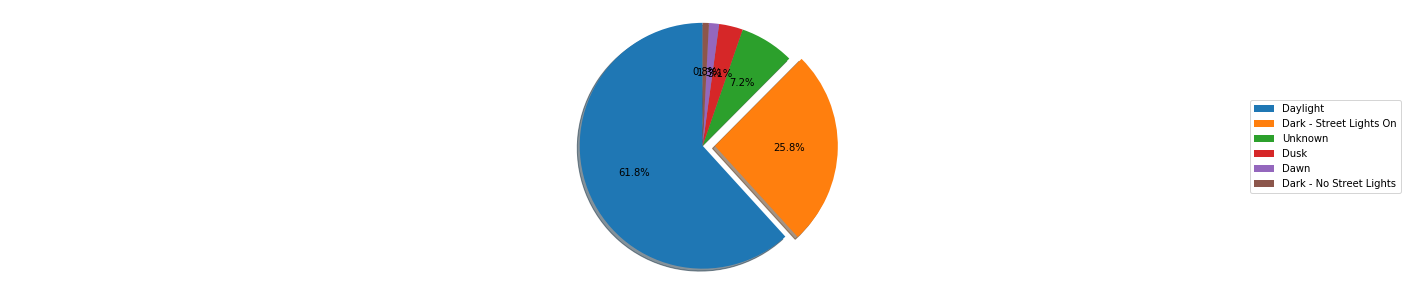

In [21]:
import seaborn as sns
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline




llabels = 'Daylight','Dark - Street Lights On','Unknown','Dusk','Dawn','Dark - No Street Lights'
#[116137,48507,1537,13484,5902,2502]
lsizes = [59.657,24.917,6.926,3.031,1.285,0.789]
explode = (0,0.1,0,0,0,0)
fig1, ax1 = plt.subplots(figsize=(25,5))
ax1.pie(lsizes, explode=explode, labels=None, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')



plt.legend (loc = 'right', labels = llabels)


plt.show()

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df2 = []
    
l = "Daylight"
dn = "Dark - No Street Lights"
dl = "Dark - Street Lights On"
dw = "Dawn"
dk = "Dusk"
for index, row in df1.iterrows():

    if l == row['LIGHTCOND']:
        df2.append(1)
    elif dn == row['LIGHTCOND']:
        df2.append(2)
    elif dl == row['LIGHTCOND']:
        df2.append(3)
    elif dw == row['LIGHTCOND']:
        df2.append(4)
    elif dk == row['LIGHTCOND']:
        df2.append(5)
    else:
        df2.append(-1)
    
    
print('done')

done


In [23]:
df1['LIGHTCOND'] = df['LIGHTCOND']
df1['LIGHTNUM'] = df2
df1.tail()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,SEVERITYCODE,LIGHTCOND,LIGHTNUM
194668,2,Daylight,1
194669,1,Daylight,1
194670,2,Daylight,1
194671,2,Dusk,5
194672,1,Daylight,1


In [24]:
import numpy as np
from sklearn.model_selection import train_test_split


X = np.asarray(df1[['LIGHTNUM','SEVERITYCODE']], dtype = int)
X[0:5]
y = np.asarray(df1['SEVERITYCODE'], dtype = int)
y[0:5]




array([2, 1, 1, 1, 2])

In [25]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)



(155738, 2) (38935, 2) (155738,) (38935,)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import neighbors, datasets
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

for n in range(1, 6):
    k = n
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    yhat = neigh.predict(X_test)

yhat[0:5]

array([2, 1, 1, 1, 1])

In [27]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
dtree
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [28]:
DTyhat = dtree.predict(X_test)
print(DTyhat [0:5])
print(y_test[0:5])

[2 1 1 1 1]
[2 1 1 1 1]


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lr = LogisticRegression(C=5,solver='liblinear').fit(X_train,y_train)
lr

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
lryhat = lr.predict(X_test)
lryhat[0:5]

array([2, 1, 1, 1, 1])

In [31]:
yhat_prob = lr.predict_proba(X_test)
yhat_prob

array([[2.31858444e-05, 9.99976814e-01],
       [9.99975826e-01, 2.41736278e-05],
       [9.99973373e-01, 2.66271080e-05],
       ...,
       [9.99978054e-01, 2.19462117e-05],
       [2.10494431e-05, 9.99978951e-01],
       [9.99980076e-01, 1.99240309e-05]])